<a href="https://colab.research.google.com/github/SachkovaYuliia/data-analysis/blob/main/DA_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Задачі кластеризації та класифікації


<h2>Мета</h2>

Ознайомитись з різновидами моделей для задач кластеризації та класифікації, а також методами побудови та оцінки цих моделей. Після завершення цієї лабораторної роботи ви зможете:

* Використовувати прості моделі для задач кластеризації та класифікації
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Виконайте кластеризацію по ВВП на душу населення та щільності населення.
2. Використайте метод ліктя для підбору оптимальної кількості кластерів.
3. Визначіть, який регіон домінує в кожному з кластерів.
4. Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).
5. Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Виконайте кластеризацію по ВВП на душу населення та щільності населення. </p>
</div>


Зчитую дані з файлу у датафрейм


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

DATA_PATH = 'clean_data2.csv'

df = pd.read_csv(DATA_PATH, sep=',', encoding='cp1252')

print(df.head())


Saving clean_data2.csv to clean_data2.csv
User uploaded file "clean_data2.csv" with length 19632 bytes
     Country Name                      Region  GDP per capita  Population  \
0     Afghanistan                  South Asia      561.778746  34656032.0   
1         Albania       Europe & Central Asia     4124.982390   2876101.0   
2         Algeria  Middle East & North Africa     3916.881571  40606052.0   
3  American Samoa         East Asia & Pacific    11834.745230     55599.0   
4         Andorra       Europe & Central Asia    36988.622030     77281.0   

    CO2 emission     Area  Population density  
0    9809.225000   652860           53.083405  
1    5716.853000    28750          100.038296  
2  145400.217000  2381740           17.048902  
3  165114.116337      200          277.995000  
4     462.042000      470          164.427660  


Виділяю параметри для кластеризації

In [ ]:
features = df[['Population', 'GDP per capita']]
features

,Population,GDP per capita
0,34656032.0,561.778746
1,2876101.0,4124.982390
2,40606052.0,3916.881571
3,55599.0,11834.745230
4,77281.0,36988.622030
...,...,...
212,102951.0,13445.593416
213,4551566.0,2943.404534
214,27584213.0,990.334774
215,16591390.0,1269.573537


Будую модель методом k середніх з кількістю кластерів 8

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import mean_squared_error, r2_score, classification_report, silhouette_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

features = features.replace('?', np.nan)
features = features.dropna()


kmeans1 = KMeans(
    init='random',
    n_clusters=8,
    n_init=10,
    max_iter=300
)

kmeans1.fit(features)


KMeans(init='random', n_init=10)

<p>Отримані центри кластерів:</p>


In [ ]:
kmeans1.cluster_centers_

array([[1.01289475e+08, 1.12556723e+04],
       [6.49289276e+06, 1.82642170e+04],
       [2.22340085e+08, 1.24727467e+04],
       [1.48059335e+07, 7.94173623e+03],
       [5.46169591e+07, 1.51681444e+04],
       [8.24957619e+05, 1.45009617e+04],
       [3.16650206e+07, 8.64990216e+03],
       [1.35141818e+09, 4.91638634e+03]])

<p>Масив із номерами кластерів для кожного рядка даних:</p>


In [ ]:
kmeans1.labels_

array([6, 5, 6, 5, 5, 6, 5, 4, 5, 5, 6, 1, 1, 5, 5, 2, 5, 1, 3, 5, 3, 5,
       5, 3, 5, 5, 2, 5, 5, 1, 3, 1, 5, 3, 6, 6, 5, 1, 3, 5, 3, 7, 4, 5,
       0, 1, 1, 6, 1, 3, 5, 5, 1, 1, 5, 5, 1, 3, 0, 1, 5, 6, 5, 0, 5, 5,
       1, 4, 5, 5, 5, 1, 0, 6, 5, 3, 5, 5, 5, 3, 3, 5, 5, 3, 1, 1, 1, 5,
       7, 2, 0, 6, 1, 5, 1, 4, 5, 0, 1, 3, 4, 5, 6, 4, 5, 1, 1, 1, 5, 1,
       5, 1, 1, 5, 5, 5, 5, 5, 6, 3, 6, 5, 3, 5, 5, 1, 5, 0, 5, 5, 5, 5,
       5, 6, 6, 4, 5, 5, 6, 3, 5, 1, 1, 3, 2, 5, 1, 1, 2, 5, 1, 1, 1, 6,
       0, 6, 1, 5, 5, 3, 0, 3, 5, 5, 5, 6, 3, 1, 5, 1, 1, 5, 1, 5, 5, 3,
       4, 3, 4, 3, 5, 5, 5, 5, 6, 5, 5, 1, 1, 3, 1, 4, 4, 5, 1, 5, 5, 3,
       0, 1, 5, 5, 6, 4, 1, 4, 2, 5, 6, 5, 6, 0, 5, 1, 6, 3, 3],
      dtype=int32)

<p>Візуалізую отримані кластери:</p>


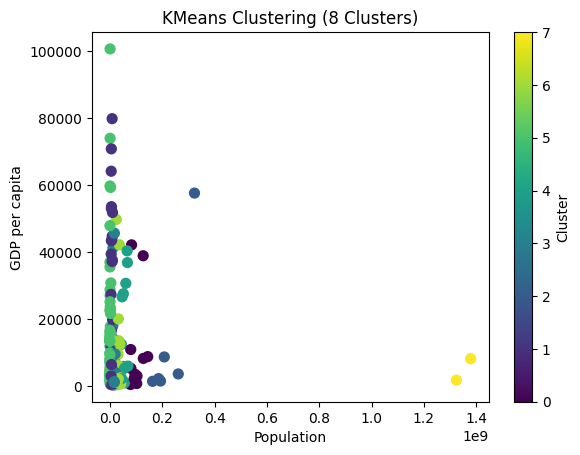

In [ ]:
plt.xlabel('Population')
plt.ylabel('GDP per capita')
plt.scatter(features['Population'], features['GDP per capita'], c=kmeans1.labels_, cmap='viridis', s=50)
plt.title('KMeans Clustering (8 Clusters)')
plt.colorbar(label='Cluster')
plt.show()

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Використайте метод ліктя для підбору оптимальної кількості кластерів.</p>
</div>


Визначаю оптимальну кількість кластерів. Скористаюсь методом "ліктя". Для цього ініціалізую алгоритм k середніх кількістю кластерів від 1 до 10 і для кожної моделі рахую суму квадратів похибок (евклідових відстаней точок кластерів від відповідних центрів):

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

sse = []

for k in range(1, 11):
    kmeans = KMeans(
        init='k-means++',
        n_clusters=k,
        n_init=10,
        max_iter=300,
    )
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

<p>Візуалізую отримані результати:</p>


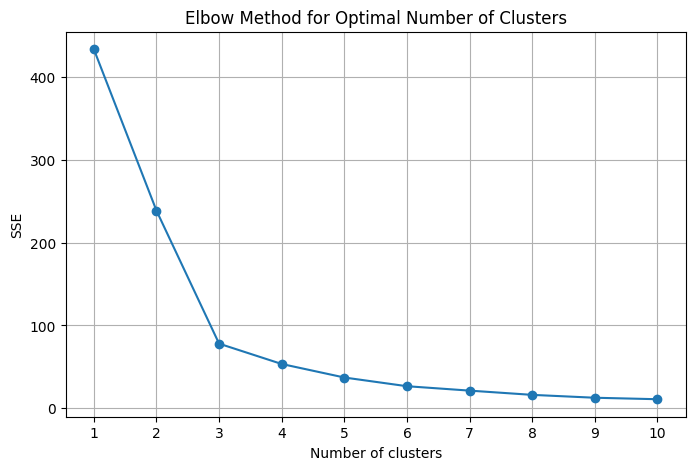

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

<p>Оптимальна кількість кластерів дорівнює 3 </p>
<p>Візуалізую для оптимальної кількості кластерів:</p>

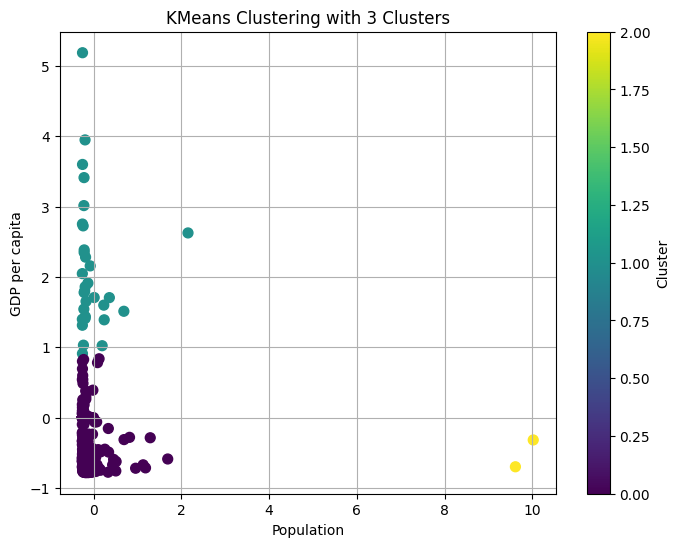

In [ ]:
optimal_k = 3
kmeans_optimal = KMeans(
    init='k-means++',
    n_clusters=optimal_k,
    n_init=10,
    max_iter=300,
)

kmeans_optimal.fit(scaled_features)

# Додаю мітки кластерів до DataFrame
features['Cluster'] = kmeans_optimal.labels_

plt.figure(figsize=(8, 6))
plt.scatter(
    features['Population'],
    features['GDP per capita'],
    c=features['Cluster'],
    cmap='viridis',
    s=50
)
plt.xlabel('Population')
plt.ylabel('GDP per capita')
plt.title(f'KMeans Clustering with {optimal_k} Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Визначіть, який регіон домінує в кожному з кластерів.</p>
</div>


Додаю мітки кластерів в датафрейм

In [ ]:
df['Cluster'] = kmeans_optimal.labels_

print(df.head())

     Country Name                      Region  GDP per capita  Population  \
0     Afghanistan                  South Asia      561.778746  34656032.0   
1         Albania       Europe & Central Asia     4124.982390   2876101.0   
2         Algeria  Middle East & North Africa     3916.881571  40606052.0   
3  American Samoa         East Asia & Pacific    11834.745230     55599.0   
4         Andorra       Europe & Central Asia    36988.622030     77281.0   

    CO2 emission     Area  Population density  Cluster  
0    9809.225000   652860           53.083405        3  
1    5716.853000    28750          100.038296        3  
2  145400.217000  2381740           17.048902        3  
3  165114.116337      200          277.995000        0  
4     462.042000      470          164.427660        1  


Визначаю домінуючий регіон для кожного кластера

In [ ]:
# Групую дані за кластерами та регіонами
dominance = df.groupby(['Cluster', 'Region']).size().reset_index(name='Count')

# Визначаю домінуючий регіон в кожному кластері
dominant_region = dominance.loc[dominance.groupby('Cluster')['Count'].idxmax()]

print(dominant_region)

    Cluster                     Region  Count
2         0  Latin America & Caribbean     23
8         1      Europe & Central Asia     16
11        2        East Asia & Pacific      1
18        3         Sub-Saharan Africa     43


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).</p>
</div>


 Обираю потрібні ознаки:


In [ ]:
features = ['GDP per capita', 'Population', 'CO2 emission', 'Area']
target = 'Region'

X = df[features]
y = df[target]

 Розділяю датасет на навчальну і тестову вибірки за допомогою функції <code>train_test_split()</code>:


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

<p>Розміщую цільові дані - Region -  в окремому датафреймі:</p>

In [ ]:
x_train = df_train[['GDP per capita', 'Population', 'CO2 emission', 'Area']]
y_train = df_train[['Region']]

x_test = df_test[['GDP per capita', 'Population', 'CO2 emission', 'Area']]
y_test = df_test[['Region']]

<h3>Навчання та тестування моделей:</h3>

Для навчання були обрані наступні методи:

- метод 1;
- метод 2;
- метод 3;
- метод 4;
- метод 5.

 <h3>Метод 1</h3>


Будую модель


In [ ]:
#from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
#from sklearn.model_selection import cross_val_score, KFold
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Оцінюю точність

In [ ]:
print('mean accuracy = ', KNN_model.score(x_test, y_test))

mean accuracy =  0.2727272727272727


 <h3>Метод 2</h3>


Будую модель


In [ ]:
SVM_model = SVC()
SVM_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

Оцінюю точність

In [ ]:
print('mean accuracy = ', SVM_model.score(x_test, y_test))

mean accuracy =  0.3181818181818182


 <h3>Метод 3</h3>


Будую модель


In [ ]:
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

Оцінюю точність

In [ ]:
print('mean accuracy = ', DT_model.score(x_test, y_test))

mean accuracy =  0.29545454545454547


 <h3>Метод 4</h3>


Будую модель


In [ ]:
RFC_model = RandomForestClassifier(n_estimators=100, random_state=42)
RFC_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

Оцінюю точність

In [ ]:
print('mean accuracy = ', RFC_model.score(x_test, y_test))

mean accuracy =  0.5454545454545454


 <h3>Метод 5</h3>


Будую модель


In [ ]:
ET_model =  ExtraTreesClassifier()
ET_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier()

Оцінюю точність

In [ ]:
print('mean accuracy = ', ET_model.score(x_test, y_test))

mean accuracy =  0.45454545454545453


<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель RFC є найкращою</b> . </p>

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.</p>
</div>


<p>Скористаюсь методом "ліктя" для визначення параметра кількості кластерів методу KMeans. </p>
<p>Для цього ініціалізую алгоритм з параметром від 1 до 10 і для кожної моделі порахую точність класифікації, щоб вибрати оптимальний параметр.</p>

In [ ]:
neighbors_range = range(1, 11)
scores = []

for n in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    scores.append(score.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.

 Отримані показники якості візуалізую на графіку:


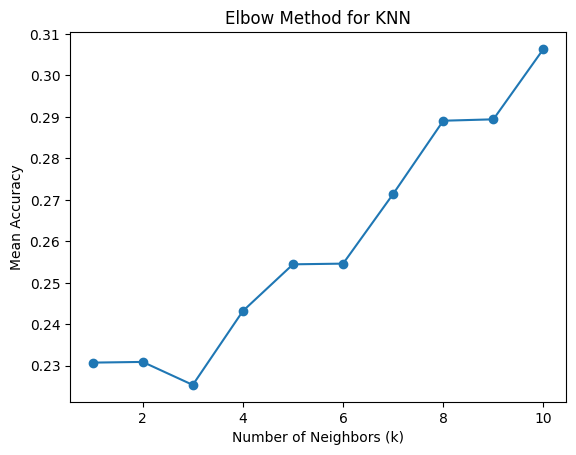

In [ ]:
plt.plot(neighbors_range, scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.title('Elbow Method for KNN')
plt.show()

З графіку бачу, що найкраще значення параметра знаходиться в межах від 9 до 10 , тому що досягає максимуму.


<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Використовуючи файл <a href="https://drive.google.com/file/d/1gxqzPQNlqrwrJI3zstMsvHQAbsdMPe-2/view?usp=drive_link" target="_blank">Data5.csv</a>:

1. Визначити кластер країн з найкращим розвитком (кластеризувати по Ie, Iec, Is; для k-середніх використати 4 кластера). Побудувати центри кластерів.
2. Провести кластеризацію по Сql, порахувати скільки країн потрапило в різні кластери, якщо порівнювати з п1.</p>
</div>


Згідно з методологією вимірювання сталого розвитку країн, сталий розвиток оцінюється за допомогою відповідного індексу у просторі трьох вимірів: економічного (Іес), екологічного (Іе) і соціально-інституціонального (Is). Цей індекс є вектором, норма якого визначає рівень сталого розвитку, а його просторове положення в системі координат (Iec,Ie,Is) характеризує міру «гармонійності» цього розвитку.

<details><summary>Натисніть тут, щоб побачити підказку до першого завдання</summary>

```python
# Зчитуємо заданий набір даних, зразу коригуючи
df = pd.read_csv(
    'Data5.csv', encoding='windows-1251', sep=';', decimal=','
).rename(columns={'Unnamed: 0': 'Country'})

df

```

</details>



Saving Data5.csv to Data5 (2).csv
User uploaded file "Data5 (2).csv" with length 9614 bytes
     Country  ISO         UA       Cql        Ie       Iec        Is
0    Albania  ALB    Албанія  0.973924  0.605348  0.538673  0.510113
1    Algeria  DZA      Алжир  0.782134  0.587219  0.348159  0.497986
2     Angola  AGO     Ангола  0.372344  0.274394  0.332117  0.346907
3  Argentina  ARG  Аргентина  0.883830  0.699685  0.281995  0.518820
4    Armenia  ARM   Вірменія  1.016499  0.718327  0.535648  0.486498
Centers of the clusters:
[[0.50062486 0.43545445 0.47490056]
 [0.76853461 0.66849294 0.63963314]
 [0.67025222 0.51146735 0.52570366]
 [0.26373834 0.39763907 0.40589422]]


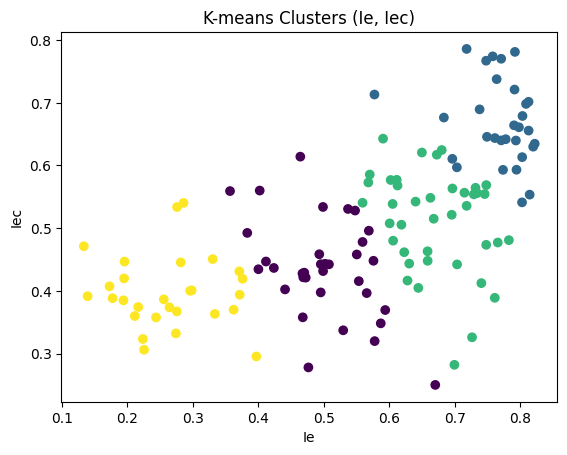

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
uploaded = files.upload()

for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

DATA_PATH = 'Data5.csv'

df = pd.read_csv(DATA_PATH, encoding='windows-1251', sep=';', decimal=',').rename(columns={'Unnamed: 0': 'Country'})

print(df.head())

# Обираю потрібні колонки для кластеризації
features = df[['Ie', 'Iec', 'Is']]

# Для k-середніх використовую 4 кластери
kmeans1 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
df['Cluster_kmeans'] = kmeans1.fit_predict(features)

# Знаходжу центри кластерів
centroids = kmeans1.cluster_centers_
print(f"Centers of the clusters:\n{centroids}")

# Додаю до датафрейму номер кластера для кожної країни
df['Cluster_kmeans'] = df['Cluster_kmeans'].astype('category')

# Будую центри кластерів
plt.scatter(df['Ie'], df['Iec'], c=df['Cluster_kmeans'], cmap='viridis')
plt.xlabel('Ie')
plt.ylabel('Iec')
plt.title('K-means Clusters (Ie, Iec)')
plt.show()

<details><summary>Натисніть тут, щоб побачити підказку до другого завдання</summary>

Номери кластерів для першого і другого методів кластеризації зовсім не обовязково співпадатимуть. Щоб знайти відповідність, подивіться в які кластери з другого методу потрапляють центри кластерів з першого.

Порахувати скільки країн потрапило в різні кластери можна з використанням матриці невідповідностей (як аргументи поставти номери кластерів для першого і другого методів кластеризації).

</details>

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

features_sql = df[['Cql']]

kmeans2 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
df['Cluster_Cql'] = kmeans2.fit_predict(features_sql)

print(f"Cluster labels for Cql method:\n{df[['Country', 'Cluster_Cql']].head()}")

Cluster labels for Cql method:
     Country  Cluster_Cql
0    Albania            3
1    Algeria            0
2     Angola            2
3  Argentina            0
4    Armenia            3
